In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import sys

# Set paths to dataset
base_path = r'C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master'
train_dir = os.path.join(base_path, 'Training')
test_dir = os.path.join(base_path, 'Test')

# Verify dataset paths with detailed feedback
if not os.path.exists(base_path):
    print(f"Error: Base directory not found at {base_path}")
    print("Please ensure the dataset is unzipped correctly to this exact path.")
    print("Steps: Unzip 'Fruit-Images-Dataset-master.zip' in 'media' folder, and check for a nested 'Fruit-Images-Dataset-master' folder.")
    sys.exit(1)
elif not os.path.exists(train_dir) or not os.path.exists(test_dir):
    print(f"Error: 'Training' or 'Test' directories not found at:")
    print(f"  - Expected Training path: {train_dir}")
    print(f"  - Expected Test path: {test_dir}")
    print(f"Please verify the unzipped dataset at {base_path} contains 'Training' and 'Test' folders.")
    print("If they are missing, check if they are in a different subfolder and adjust 'base_path' accordingly.")
    sys.exit(1)
else:
    print(f"Dataset directories found:")
    print(f"  - Training: {train_dir}")
    print(f"  - Test: {test_dir}")

# Count number of classes
try:
    NUM_CLASSES = len([name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))])
    print(f"Detected {NUM_CLASSES} fruit classes.")
    if NUM_CLASSES != 131:
        print(f"Warning: Expected 131 classes, but found {NUM_CLASSES}. Proceeding anyway.")
except Exception as e:
    print(f"Error counting classes in {train_dir}: {e}")
    sys.exit(1)

# Image parameters
IMG_SIZE = 100  # Fruits-360 images are 100x100
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
try:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )
    print(f"Loaded {train_generator.samples} training images.")

    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=True
    )
    print(f"Loaded {val_generator.samples} validation images.")

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )
    print(f"Loaded {test_generator.samples} test images.")
except Exception as e:
    print(f"Error loading data from {train_dir} or {test_dir}: {e}")
    print("Ensure subfolders (e.g., 'Apple Braeburn', 'Banana') contain .jpg images.")
    sys.exit(1)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Train model
try:
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=val_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        validation_steps=val_generator.samples // BATCH_SIZE
    )
except Exception as e:
    print(f"Error during training: {e}")
    print("Possible causes: Insufficient memory, corrupted images, or incompatible data.")
    sys.exit(1)

# Evaluate model on test set
try:
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
except Exception as e:
    print(f"Error during evaluation: {e}")
    sys.exit(1)

# Save model
try:
    model.save('fruit_cnn_model.h5')
    print("Model saved as 'fruit_cnn_model.h5' in the current directory.")
except Exception as e:
    print(f"Error saving model: {e}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Dataset directories found:
  - Training: C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Training
  - Test: C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Test
Detected 131 fruit classes.
Found 54190 images belonging to 131 classes.
Loaded 54190 training images.
Found 13502 images belonging to 131 classes.
Loaded 13502 validation images.
Found 22688 images belonging to 131 classes.
Loaded 22688 test images.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 131)            │        67,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,714,563 (25.61 MB)

 Trainable params: 6,714,563 (25.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 154/1693 ━━━━━━━━━━━━━━━━━━━━ 21:22 834ms/step - accuracy: 0.0264 - loss: 4.6218

KeyboardInterrupt: 

Dataset directories found:
  - Training: C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Training
  - Test: C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Test
Detected 131 fruit classes.
Found 54190 images belonging to 131 classes.
Loaded 54190 training images.
Found 13502 images belonging to 131 classes.
Loaded 13502 validation images.
Found 22688 images belonging to 131 classes.
Loaded 22688 test images.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 131)            │        67,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,714,563 (25.61 MB)

 Trainable params: 6,714,563 (25.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.0833 - loss: 4.0323 - val_accuracy: 0.5858 - val_loss: 1.4710
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 395s 791ms/step - accuracy: 0.5230 - loss: 1.4991 - val_accuracy: 0.7902 - val_loss: 0.6952
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 344s 690ms/step - accuracy: 0.7328 - loss: 0.8086 - val_accuracy: 0.7984 - val_loss: 0.6451
Epoch 4/10
194/500 ━━━━━━━━━━━━━━━━━━━━ 2:30 493ms/step - accuracy: 0.8003 - loss: 0.6084

c:\Users\amyak\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 147s 293ms/step - accuracy: 0.7959 - loss: 0.6107 - val_accuracy: 0.8602 - val_loss: 0.4658
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 434s 869ms/step - accuracy: 0.8187 - loss: 0.5425 - val_accuracy: 0.8995 - val_loss: 0.3389
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4082s 8s/step - accuracy: 0.8438 - loss: 0.4556 - val_accuracy: 0.8731 - val_loss: 0.4220
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 350s 702ms/step - accuracy: 0.8654 - loss: 0.4038 - val_accuracy: 0.9016 - val_loss: 0.3207
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 152s 304ms/step - accuracy: 0.8817 - loss: 0.3500 - val_accuracy: 0.8936 - val_loss: 0.3495
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 390s 779ms/step - accuracy: 0.8860 - loss: 0.3334 - val_accuracy: 0.8945 - val_loss: 0.3455
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 326s 652ms/step - accuracy: 0.8851 - loss: 0.3474 - val_accuracy: 0.9169 - val_loss: 0.3050
709/709 ━━━━━━━━━━━━━━━━━━━━ 264s 373ms/step - accuracy: 0.9211 - loss: 0.2804


Test Accuracy: 94.37%
Model saved as 'fruit_cnn_model.h5' in the current directory.


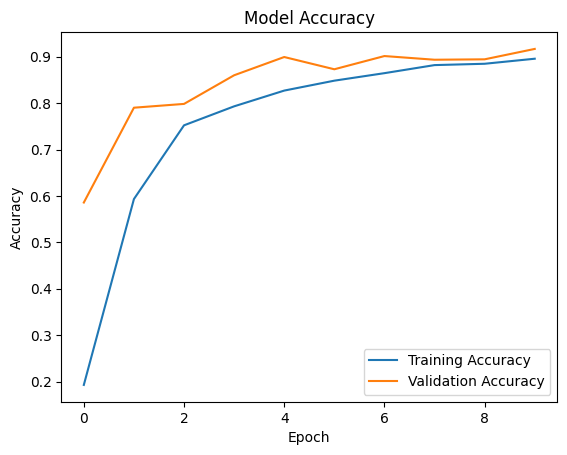

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import sys

# Set paths to dataset
base_path = r'C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master'
train_dir = os.path.join(base_path, 'Training')
test_dir = os.path.join(base_path, 'Test')

# Verify dataset paths with detailed feedback
if not os.path.exists(base_path):
    print(f"Error: Base directory not found at {base_path}")
    print("Please ensure the dataset is unzipped correctly to this exact path.")
    print("Steps: Unzip 'Fruit-Images-Dataset-master.zip' in 'media' folder, and check for a nested 'Fruit-Images-Dataset-master' folder.")
    sys.exit(1)
elif not os.path.exists(train_dir) or not os.path.exists(test_dir):
    print(f"Error: 'Training' or 'Test' directories not found at:")
    print(f"  - Expected Training path: {train_dir}")
    print(f"  - Expected Test path: {test_dir}")
    print(f"Please verify the unzipped dataset at {base_path} contains 'Training' and 'Test' folders.")
    print("If they are missing, check if they are in a different subfolder and adjust 'base_path' accordingly.")
    sys.exit(1)
else:
    print(f"Dataset directories found:")
    print(f"  - Training: {train_dir}")
    print(f"  - Test: {test_dir}")

# Count number of classes
try:
    NUM_CLASSES = len([name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))])
    print(f"Detected {NUM_CLASSES} fruit classes.")
    if NUM_CLASSES != 131:
        print(f"Warning: Expected 131 classes, but found {NUM_CLASSES}. Proceeding anyway.")
except Exception as e:
    print(f"Error counting classes in {train_dir}: {e}")
    sys.exit(1)

# Image parameters
IMG_SIZE = 100
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
try:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )
    print(f"Loaded {train_generator.samples} training images.")

    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=True
    )
    print(f"Loaded {val_generator.samples} validation images.")

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )
    print(f"Loaded {test_generator.samples} test images.")
except Exception as e:
    print(f"Error loading data from {train_dir} or {test_dir}: {e}")
    print("Ensure subfolders (e.g., 'Apple Braeburn', 'Banana') contain .jpg images.")
    sys.exit(1)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Train model
try:
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=val_generator,
        steps_per_epoch=500,
        validation_steps=val_generator.samples // BATCH_SIZE
    )
except Exception as e:
    print(f"Error during training: {e}")
    print("Possible causes: Insufficient memory, corrupted images, or incompatible data.")
    sys.exit(1)

# Evaluate model on test set
try:
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
except Exception as e:
    print(f"Error during evaluation: {e}")
    sys.exit(1)

# Save model
try:
    model.save('fruit_cnn_model.h5')
    print("Model saved as 'fruit_cnn_model.h5' in the current directory.")
except Exception as e:
    print(f"Error saving model: {e}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the trained model
model = tf.keras.models.load_model('fruit_cnn_model.h5')

# Set parameters
IMG_SIZE = 100 

# Load class labels from training directory
train_dir = r'C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Training'
class_labels = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Function to predict a single image
def predict_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_labels[predicted_class_index]

        print(f"Predicted Class: {predicted_class}")
    except Exception as e:
        print(f"Error processing image: {e}")

# Example usage
img_path = r'C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Test\Apple Braeburn\3_100.jpg'
predict_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
Predicted Class: Apple Braeburn


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the trained model
model = tf.keras.models.load_model('fruit_cnn_model.h5')

# Set parameters
IMG_SIZE = 100

# Load class labels from training directory
train_dir = r'C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Training'
class_labels = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Function to predict a single image
def predict_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_labels[predicted_class_index]

        print(f"Predicted Class: {predicted_class}")
    except Exception as e:
        print(f"Error processing image: {e}")

# Example usage
img_path = r'C:\Users\amyak\Desktop\Fruit_Identification_Using_Convolutional_Neural_Network\media\Fruit-Images-Dataset-master\Fruit-Images-Dataset-master\Test\Apple Red 1\3_100.jpg'
predict_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
Predicted Class: Apple Red 1
